In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img = cv.imread("photos/face.webp")
cat = cv.imread("photos/cat.jpeg")
cat_gray = cv.cvtColor(cat,cv.COLOR_BGR2GRAY)
blank = np.zeros(cat.shape,dtype = "uint8")

# cv.imshow("Cat Orignal",cat)
cv.imshow("Cat",cat_gray)

blur = cv.GaussianBlur(cat,(5,5),cv.BORDER_DEFAULT)
cv.imshow("Blurred",blur)
# Canny -> edges of image
canny = cv.Canny(blur,125,175)
cv.imshow("Edges",canny)

# find threshold image
ret , thres = cv.threshold(cat_gray,120,255,type= cv.THRESH_BINARY )

cv.imshow("Thresh",thres)



cv.waitKey(0)

255

In [2]:
# Find Contours
_,contours,hierarchies =cv.findContours(canny,cv.RETR_LIST,cv.CHAIN_APPROX_NONE)
# draw contours
cv.drawContours(blank,contours,-1,(0,0,255),1)
cv.imshow("Drawn Cont",blank)
cv.waitKey(0)
cv.destroyAllWindows()

In [3]:

rgb = cv.cvtColor(cat,cv.COLOR_BGR2RGB)
newI = cv.cvtColor(rgb,cv.COLOR_RGB2BGR)
cv.imshow("New",newI)
cv.destroyAllWindows()
# plt.imshow(rgb)
# plt.imshow(newI)
# plt.show()

In [4]:
# Thresholding ------------ (openCV)

ret, thresh1 =  cv.threshold(cat_gray,127,255,cv.THRESH_BINARY)
ret, thresh2 =  cv.threshold(cat_gray,127,255,cv.THRESH_BINARY_INV)
ret, thresh3 =  cv.threshold(cat_gray,127,255,cv.THRESH_MASK)
ret, thresh4 =  cv.threshold(cat_gray,127,255,cv.THRESH_TOZERO)
ret, thresh5 =  cv.threshold(cat_gray,127,255,cv.THRESH_TOZERO_INV)

th2 = cv.adaptiveThreshold(cat_gray,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,2)
canny1 = cv.Canny(cat_gray,127,255)
cv.imshow("Canny from grey scale",canny1)
_, contours, hei = cv.findContours(th2,cv.RETR_LIST,cv.CHAIN_APPROX_NONE)
blank1 = np.zeros(cat.shape,dtype = "uint8")

cv.drawContours(blank1,contours,-1,(0,0,255),1)

# cv.imshow("Bin",thresh1)
# cv.imshow("Bin inv",thresh2)
# cv.imshow("MAsk",thresh3)
# cv.imshow("tzer",thresh4)
cv.imshow("Adaptive Thresh MEAN",th2)
cv.imshow("Contours Drawn",blank1)
cv.waitKey(0)
cv.destroyAllWindows()

In [5]:
# Colour Channels
# Take same image of cat
b,g,r = cv.split(cat)
cv.imshow("BLUE",b)
cv.imshow("Green",g)
cv.imshow("Red",r)

merged = cv.merge([b,g,r])
cv.imshow("Merged",merged)
cv.waitKey(0)
cv.destroyAllWindows()


In [14]:
blue = np.uint8([[[255,0,0 ]]]) #BGR 
hsv_blue = cv.cvtColor(blue,cv.COLOR_BGR2HSV)
print(hsv_green)
#  H S V
# Lower [ H-10 , 100 , 100 ]
# Upper [H+10 , 255, 255]

[[[120 255 255]]]


In [ ]:
# Object Tracking in the video
capture = cv.VideoCapture(0)
# while True:
#     # Detect Blue object [B G R]     
#     isTrue, frame= capture.read()
    
# #     img = cv.cvtColor(frame,cv.COLOR_BGR2HSV)
# #     lower_blue = np.array([110,100,100])
# #     upper_blue = np.array([130,255,255])
# #     mask = cv.inRange(img, lower_blue, upper_blue)
# #     res = cv.bitwise_and(frame,frame, mask= mask)
#     cv.imshow('frame',frame)
# #     cv.imshow('mask',mask)
# #     cv.imshow('res',res)
#     k = cv.waitKey(5) & 0xFF
#     if k == 27:
#         break
    

cv.destroyAllWindows()

In [17]:
# Blurring
img = cv.imread("photos/cat.jpeg")
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

# Blur - averaging
blur = cv.blur(img,(3,3))
# Gauss 
gauss = cv.GaussianBlur(img,(3,3),0)
canny_gauss = cv.Canny(gauss,125,175)
# cv.imshow("Canny Gauss",canny_gauss)
# median bluring - used for reducing noice in the images

median = cv.medianBlur(img,3)

# Bilateral blurring  - used often - retains edges
bilateral = cv.bilateralFilter(img,5,15,15)

cv.imshow("Blured",blur)
cv.imshow("Cat",img)
cv.imshow("Gauss Blur",gauss)
cv.imshow("Median Blur",median)
cv.waitKey(0)

255

In [5]:
# Bitwise operations
blank = np.zeros((400,400), dtype="uint8")
# cv.imshow("Blank",blank)

rectangle = cv.rectangle(blank.copy(),(30,30),(370,370),255,-1)
circle = cv.circle(blank.copy(),(200,200),200,255,-1)
and_bit = cv.bitwise_and(rectangle,circle)
not_bit = cv.bitwise_not(rectangle)
cv.imshow("Not",not_bit)
cv.imshow("Rectangle",rectangle)
cv.imshow("Circle",circle)
cv.imshow("And",and_bit)

cv.waitKey(0)

255

In [10]:
# Masking - using bitwise
blank = np.zeros(cat.shape[:2],dtype="uint8")

mask = cv.circle(blank,(cat.shape[1]//2,cat.shape[0]//2), 150,255,-1)

masked = cv.bitwise_and(cat,cat,mask=mask)
cv.imshow("Masked",masked)
cv.waitKey(0)


255

In [18]:
blank = np.zeros(cat.shape[:2],dtype = "uint8")
gray = cv.cvtColor(cat,cv.COLOR_BGR2GRAY)
circle = cv.circle(blank.copy(),(cat.shape[1]//2 , cat.shape[0]//2),100,255,-1)
print(circle.shape)
mask = cv.bitwise_and(cat,cat,mask=circle)
print(mask.shape)
# cv.imshow("Masked",mask)
cv.waitKey(0)

(549, 976)
(549, 976, 3)


255

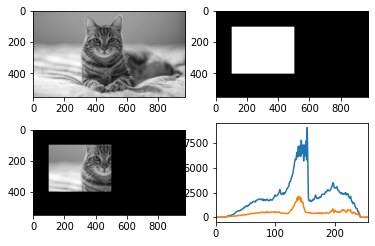

255

In [42]:
mask = np.zeros(cat.shape[:2],dtype= "uint8")
mask[100:400,100:500] = 255
masked = cv.bitwise_and(cat_gray,cat_gray, mask=mask)

cv.imshow("Masked",masked)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv.calcHist([cat_gray],[0],None,[256],[0,256])
hist_mask = cv.calcHist([cat_gray],[0],mask,[256],[0,256])


plt.subplot(221), plt.imshow(cat_gray, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])

plt.show()

cv.waitKey(0)